In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from PIL import Image
import os

In [4]:
# Load and split the paired image
img = Image.open("city.jpg").convert("RGB")
w, h = img.size
left = img.crop((0, 0, w//2, h))     # input
right = img.crop((w//2, 0, w, h))    # target

# Preprocess
transform = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor()
])
input_tensor = transform(left).unsqueeze(0)  # (1, 3, 256, 256)
target_tensor = transform(right).unsqueeze(0)

In [5]:
import torch.nn as nn

class DummyGenerator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 3, 3, padding=1),
            nn.Tanh()
        )
    def forward(self, x):
        return self.model(x)

G = DummyGenerator()
output = G(input_tensor)

# Visualize input, output, and target
def show(tensor, title):
    img = tensor.squeeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow((img + 1) / 2)  # Normalize if using Tanh
    plt.title(title)
    plt.axis("off")
    plt.show()

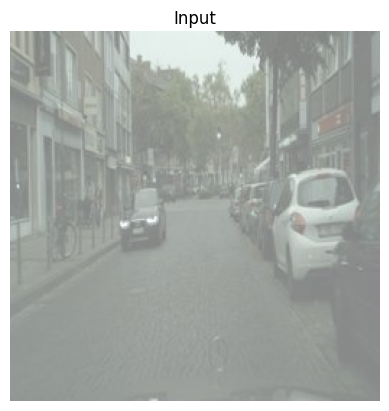

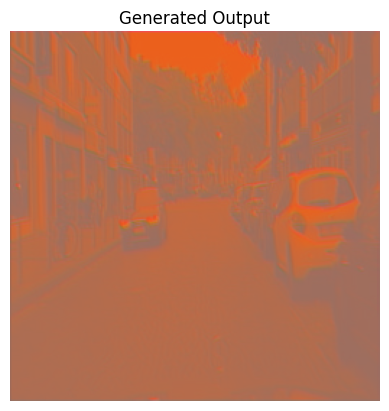

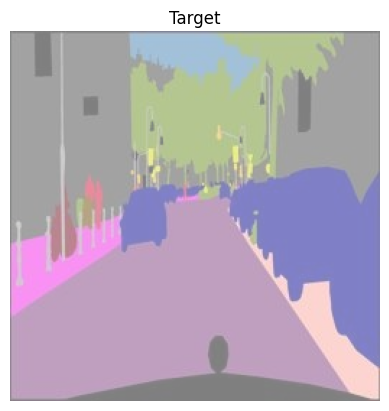

In [6]:
show(input_tensor, "Input")
show(output, "Generated Output")
show(target_tensor, "Target")